# Hadoop Streaming MapReduce — Detailed Steps

This notebook documents the step-by-step process of running the MapReduce assignment using
Zeppelin, HDFS, and Hadoop Streaming.

## Step 1 — Exploring Files in the VM

We first list available directories:

In [ ]:
%sh
ls

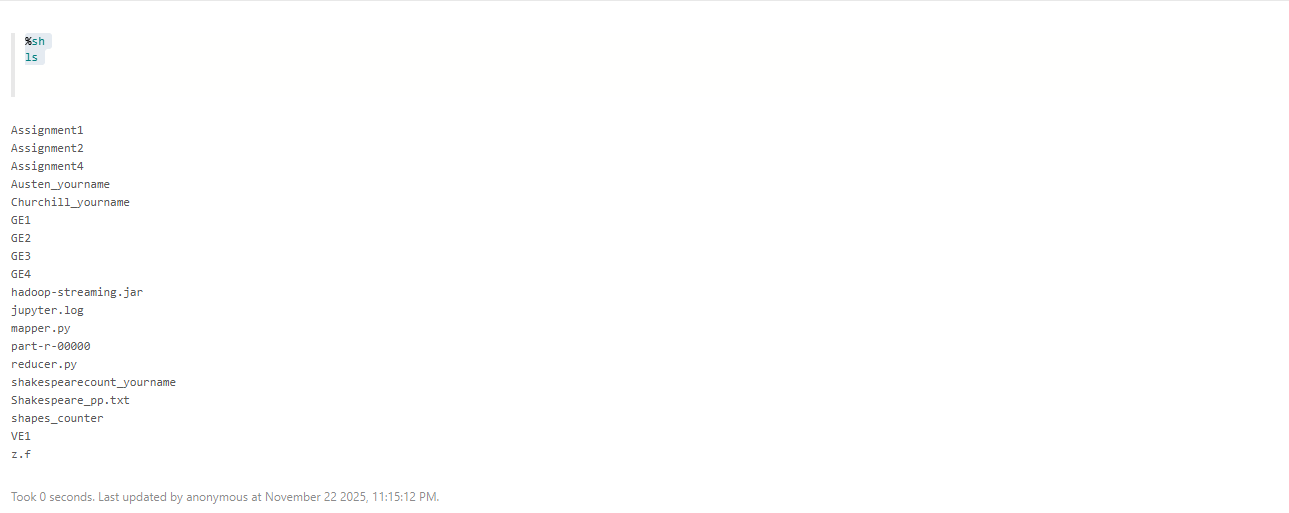

## Step 2 — Creating a folder in HDFS

I will want to create a new folder where I will do the assignment,

In [ ]:
%sh
hadoop fs -mkdir my_new_folder

If I try to run the querry again, It will show that the file already exists. This is to confirm that our new folwer has been created

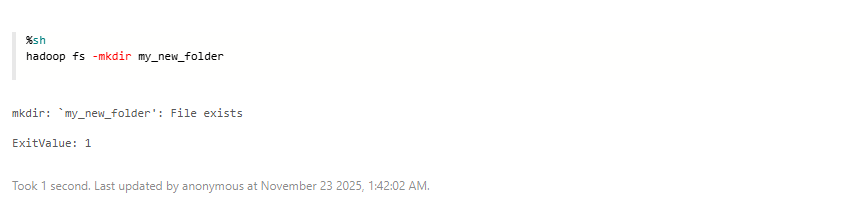

We can seen the new folder here using the the 

%sh
hadoop fs -ls 



In [ ]:
%sh
hadoop fs -ls 

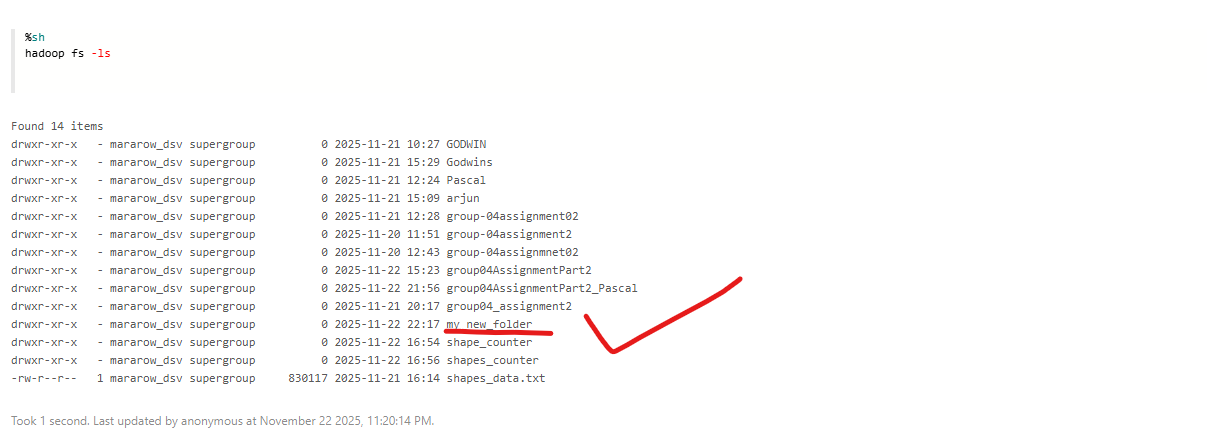

Take the entire Assignment2 folder from the local system and copy it into the HDFS folder called my_new_folder.

In [ ]:
%sh
hadoop fs -copyFromLocal Assignment2 my_new_folder


Verify that the Assignment2 folder was successfully uploaded into HDFS, we list the contents of the target HDFS directory
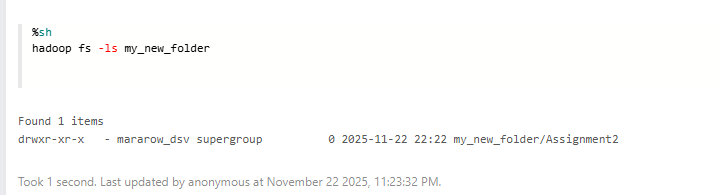

After copying the Assignment2 directory into HDFS, we verify that all required files are present by listing the contents of the target directory

In [ ]:
%sh
hadoop fs -ls my_new_folder/Assignment2


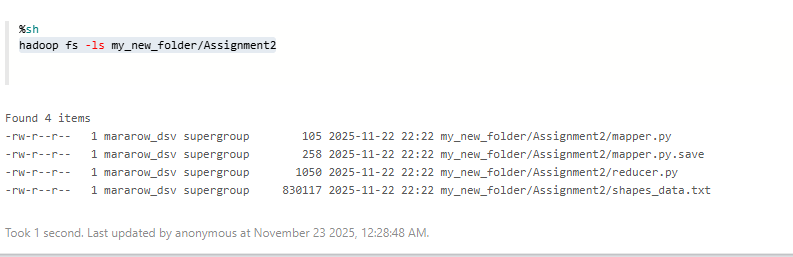

We veriffy the content of the Shape_date.text (this is our main file, from which we are trying to count and classify the shapes)

In [ ]:
%sh
hadoop fs -head my_new_folder/Assignment2/shapes_data.txt

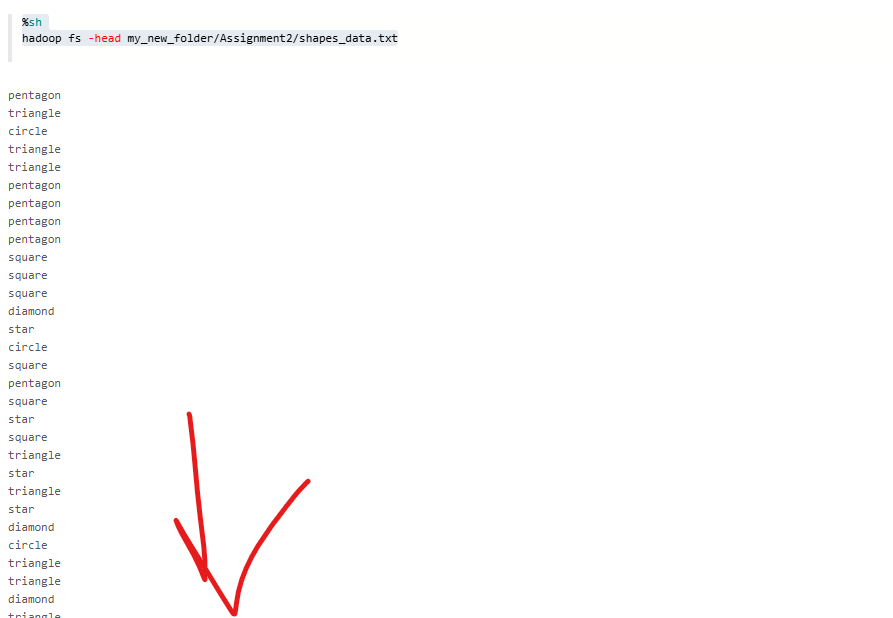

The next step is to run this command to display the contents of the file mapper.py that is stored inside HDFS.

It lets us check what is inside the mapper script to ensure it was uploaded correctly and contains the right code before running your Map job.

%sh
hadoop fs -cat my_new_folder/Assignment2/mapper.py

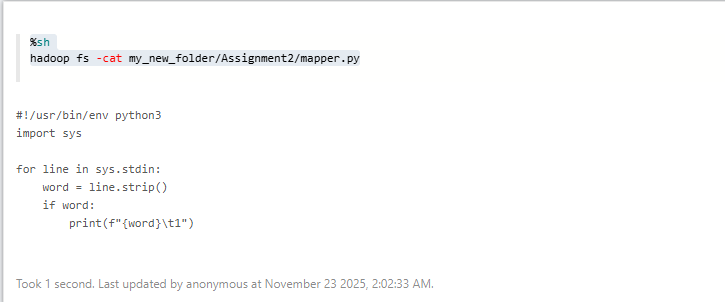

We run this as well to confirm that our reducer script is okay before running our reducer job

In [ ]:
%sh
hadoop fs -copyFromLocal -f reducer_new.py my_new_folder/Assignment2/reducer.py

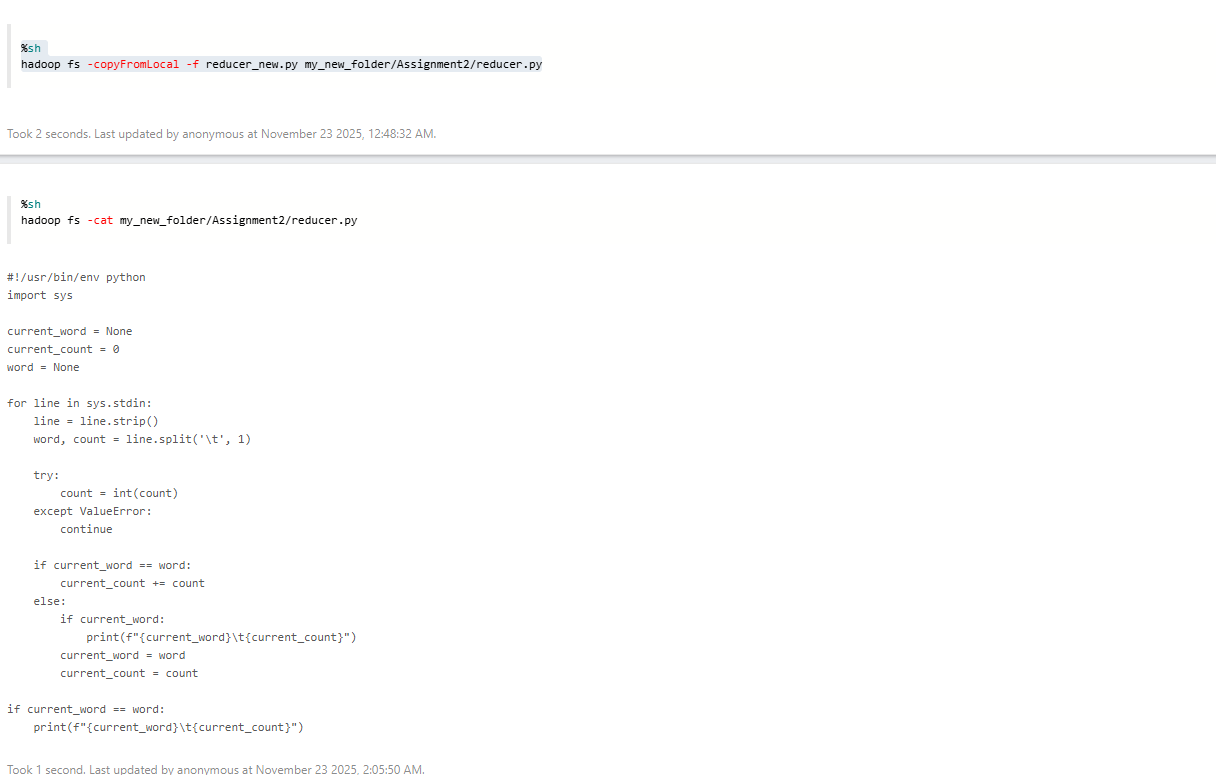

We test the mapper by sending three sample shapes to it to show the epected <shape> Output
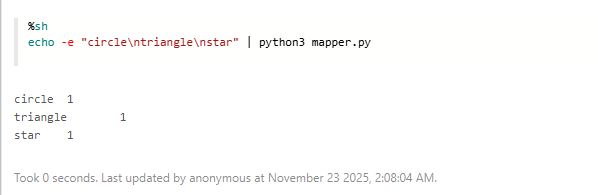

We run this function so that we can move to the local folders "Assignement2" to run our jobs from there

In [ ]:
%sh
cd Assignment2

Now, It is time to run or jobs (Map and reduce).

1. The command first deletes any old shapes_counter folder in HDFS to avoid output conflicts.
2. It then runs a Hadoop Streaming job using mapper.py and reducer.py on the dataset stored in my_new_folder/Assignment2/shapes_data.txt.
3. The logs shown confirm that Hadoop accepted the job, split the input, and started running the Map and Reduce tasks.

In [ ]:
%sh
hadoop fs -rm -r shapes_counter

hadoop jar hadoop-streaming.jar \
  -files mapper.py,reducer.py \
  -input my_new_folder/Assignment2/shapes_data.txt \
  -output shapes_counter \
  -mapper mapper.py \
  -reducer reducer.py 

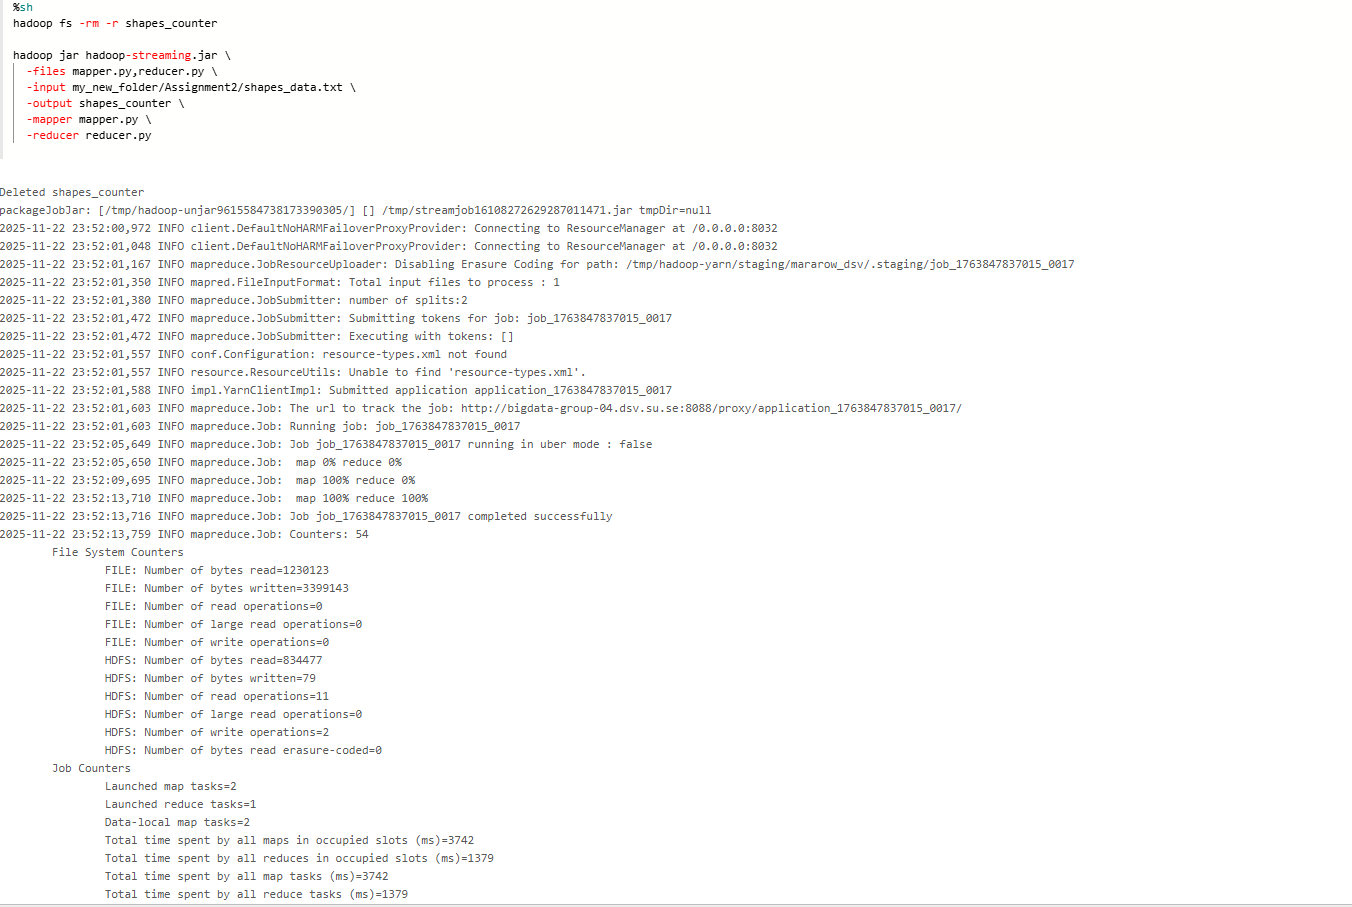

We print the final MapReduce output file from HDFS so you can see the shape counts produced by the reducer using this code:

In [ ]:
%sh
hadoop fs -cat shapes_counter/part-*

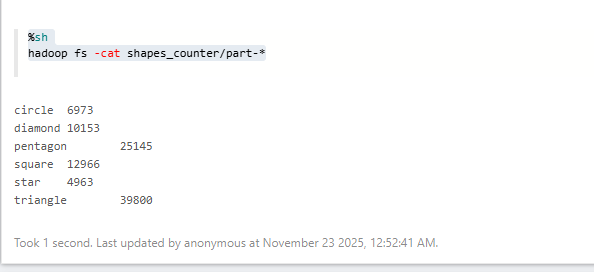

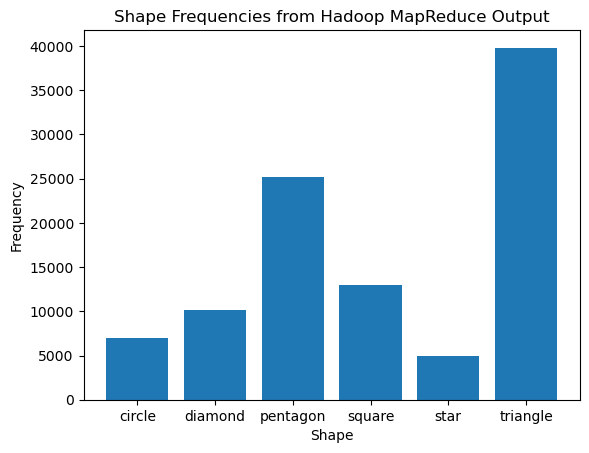

In [1]:
shapes = ["circle", "diamond", "pentagon", "square", "star", "triangle"]
counts = [6973, 10153, 25145, 12966, 4963, 39800]

import matplotlib.pyplot as plt

plt.figure()
plt.bar(shapes, counts)
plt.xlabel("Shape")
plt.ylabel("Frequency")
plt.title("Shape Frequencies from Hadoop MapReduce Output")
plt.show()